In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Installing openpyxl to open excel files
df = pd.read_excel('Chapter5_TOC_Prediction_DataSet.xlsx')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Thickness_ft,987.0,150.448933,52.452284,50.218753,123.462354,141.662622,166.707110,475.992627
Bulk Density_gg per cc,987.0,2.423001,0.019059,2.386117,2.409469,2.422639,2.433418,2.540608
Resistivity_ohmsm,987.0,3.892432,1.342193,1.680451,3.120852,3.650354,4.319585,15.970625
Effective Porosity_Fraction,987.0,0.061492,0.014805,0.017432,0.051250,0.061158,0.072289,0.096054
Clay Volume_Fraction,987.0,0.271257,0.045289,0.153118,0.238607,0.264785,0.303776,0.413083
Water Saturation_Fraction,987.0,0.435876,0.080023,0.230041,0.372234,0.442414,0.490972,0.683304
TOC_Fraction,987.0,0.052630,0.005062,0.030830,0.051026,0.053662,0.056100,0.060907


C:\Users\Norain89\AppData\Local\Temp\ipykernel_11272\1023261200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Thickness_ft'], color = 'red', ax = axes[0,0])
c:\Users\Norain89\anaconda3\envs\myenv3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Norain89\AppData\Local\Temp\ipykernel_11272\1023261200.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `

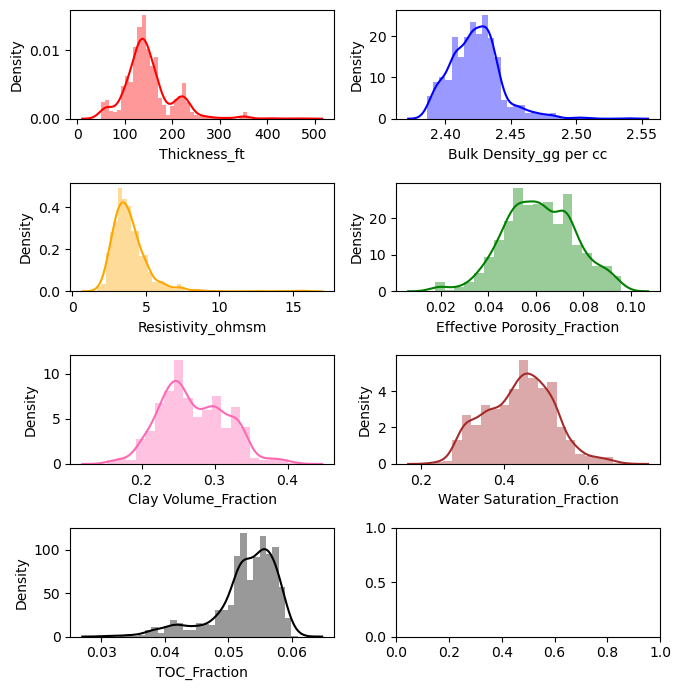

In [3]:
#Visualizing the distribution plot of each feature
f, axes = plt.subplots(4, 2, figsize=(7,7))
sns.distplot(df['Thickness_ft'], color = 'red', ax = axes[0,0])
sns.distplot(df['Bulk Density_gg per cc'], color = 'blue', ax = axes[0,1])
sns.distplot(df['Resistivity_ohmsm'], color = 'orange', ax = axes [1,0])
sns.distplot(df['Effective Porosity_Fraction'], color = 'green', ax = axes[1,1])
sns.distplot(df['Clay Volume_Fraction'], color = 'hotpink', ax = axes[2,0])
sns.distplot(df['Water Saturation_Fraction'], color = 'brown', ax = axes[2,1])
sns.distplot(df['TOC_Fraction'], color = 'black', ax = axes[3,0])
plt.tight_layout()

c:\Users\Norain89\anaconda3\envs\myenv3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Norain89\anaconda3\envs\myenv3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Norain89\anaconda3\envs\myenv3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Norain89\anaconda3\envs\myenv3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

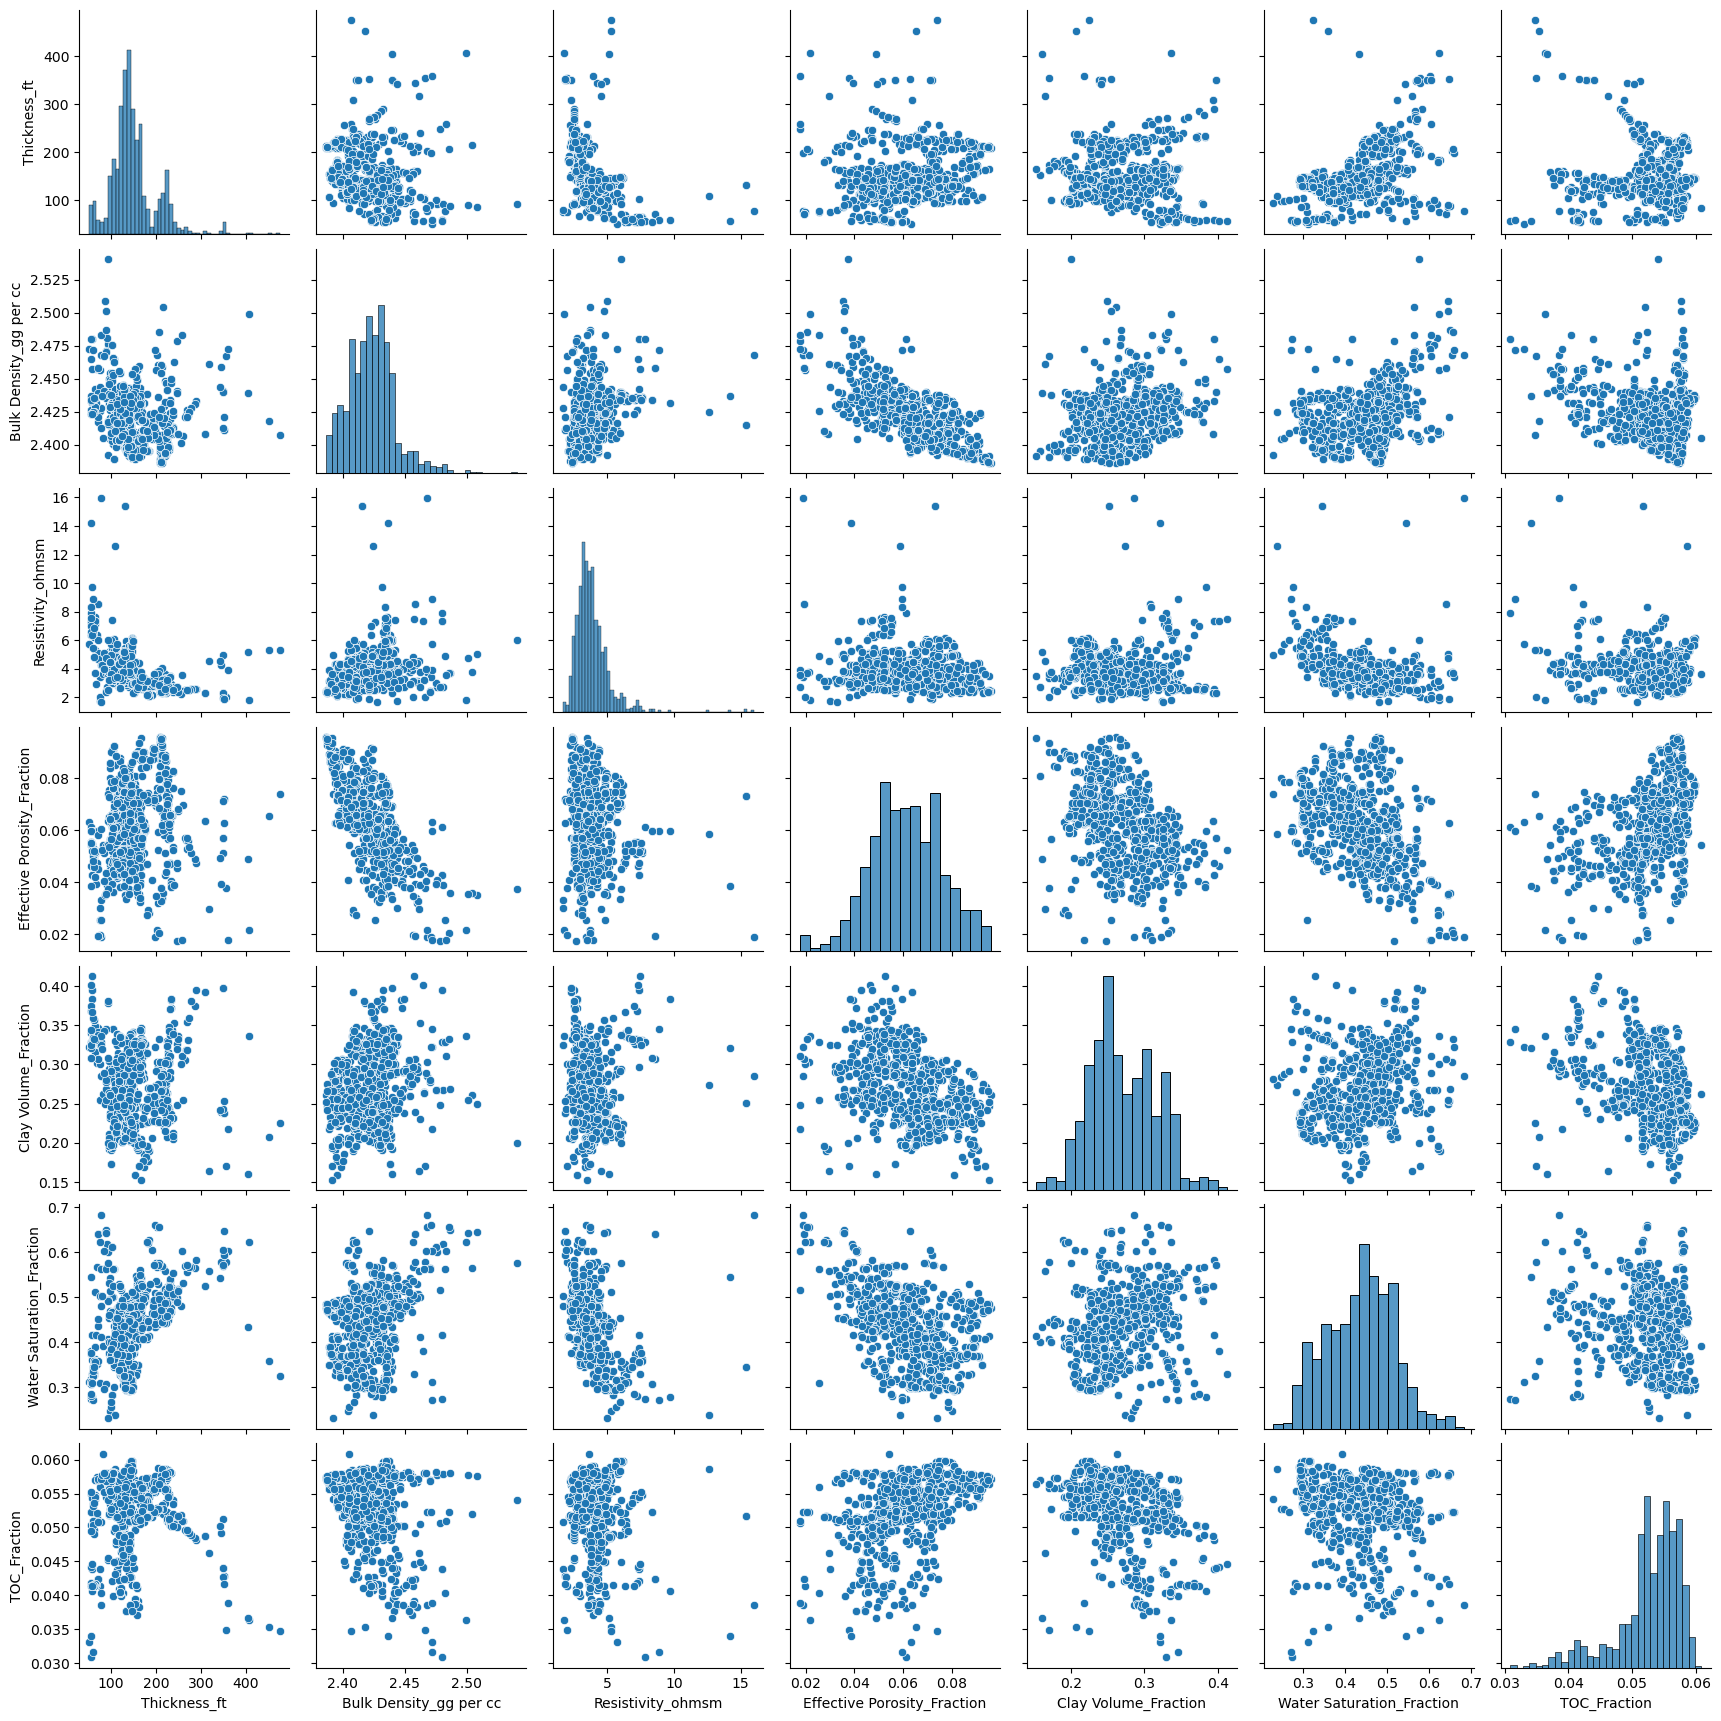

In [4]:
#Pair plot of all features
sns.pairplot(df)

<Axes: >

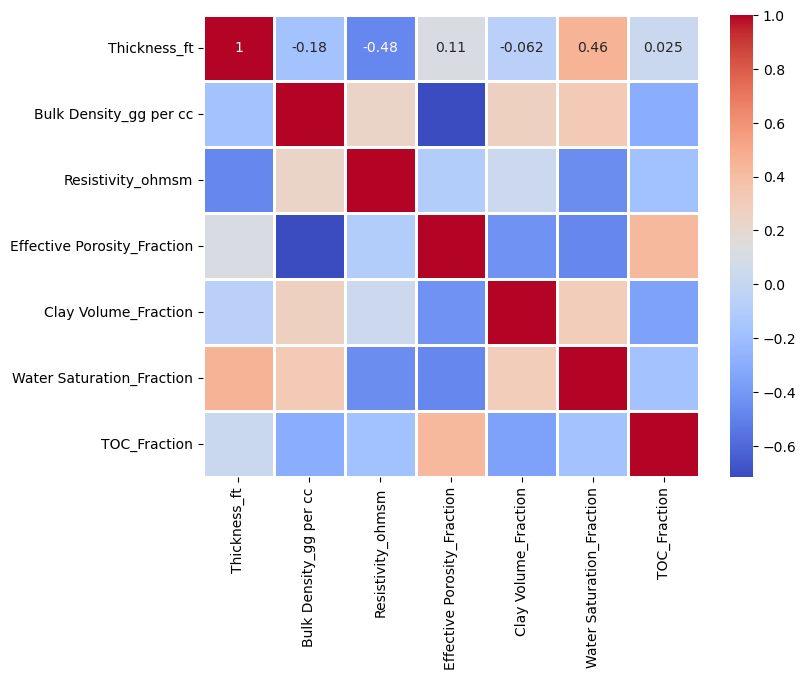

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidths=2, cmap='coolwarm')

In [6]:
#Defining x and y variables
x = df.drop(['TOC_Fraction'], axis = 1)
y = df['TOC_Fraction']

In [7]:
#Import the train_test_split library and use a 70/30 split
from sklearn.model_selection import train_test_split
seed = 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split\
    (x, y, test_size = 0.30)    

In [8]:
#Import DesicionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [12]:
#Defining the decision tree parameters
dtree = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None,
                              min_samples_split=4, min_samples_leaf=2, max_features=None, ccp_alpha=0)

In [13]:
#Apply "dtree" to "X_train.y_train" 
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, min_samples_leaf=2, min_samples_split=4)

In [14]:
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [15]:
#Obtain the training and testing R2
corr_train = np.corrcoef(y_train, y_pred_train) [0,1]
print('Training Data R^2=', round(corr_train**2,4), 'R=', round(corr_train,4))

Training Data R^2= 0.9758 R= 0.9878


In [16]:
corr_test = np.corrcoef(y_test, y_pred_test) [0,1]
print('Training Data R^2=', round(corr_test**2,4), 'R=', round(corr_test,4))

Training Data R^2= 0.6852 R= 0.8278


Text(0.5, 1.0, 'TOC Training Actual Vs. Prediction')

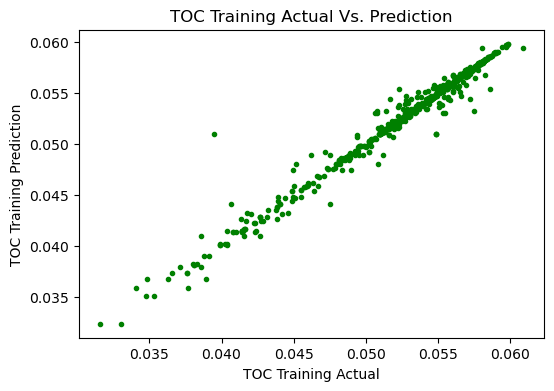

In [18]:
#TOC training actual versus prediction
plt.figure(figsize=(6,4))
plt.plot(y_train, y_pred_train, 'g.')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')

Text(0.5, 1.0, 'TOC Testing Actual Vs. Prediction')

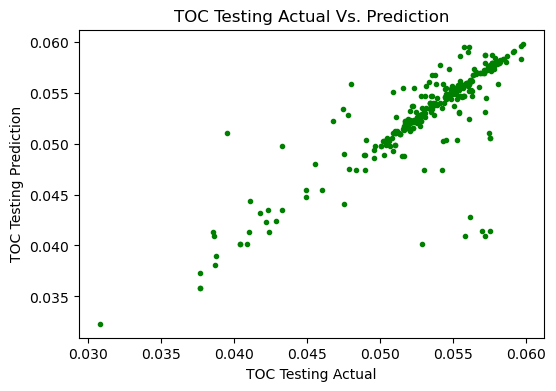

In [19]:
#TOC testing actual versus prediction
plt.figure(figsize=(6,4))
plt.plot(y_test, y_pred_test, 'g.')
plt.xlabel('TOC Testing Actual')
plt.ylabel('TOC Testing Prediction')
plt.title('TOC Testing Actual Vs. Prediction')

In [20]:
#Comparing the actual and predicted TOC values for testing set
TOC_Actual_Prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
TOC_Actual_Prediction

,Actual,Predicted
834,0.051979,0.051979
604,0.053110,0.053445
747,0.057625,0.058708
908,0.057235,0.054457
545,0.054575,0.054701
...,...,...
809,0.056807,0.056949
166,0.054815,0.054362
172,0.058651,0.058570
263,0.058120,0.057927


In [22]:
#Evaluate the model from all aspects, MAE, MSE, RMSE
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test), 5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test), 5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)), 5))

MAE: 0.00122
MSE: 1e-05
RMSE: 0.00277


In [23]:
#Ranking the features using "dtree.feature_ipoertances"
dtree.feature_importances_

array([0.29639873, 0.11434644, 0.12938515, 0.25093988, 0.13620902,
       0.07272077])

Text(0.5, 1.0, 'Feature Importance Ranking')

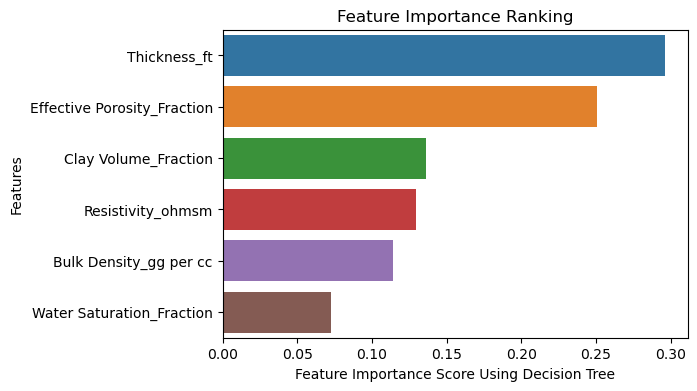

In [26]:
#Visualization through tornado chart
feature_names = df.columns[:-1]
plt.figure(figsize=(6,4))
feature_imp = pd.Series(dtree.feature_importances_, index = feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Decision Tree')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')

In [28]:
from sklearn.model_selection import cross_val_score
np.random.seed(seed)
scores_R2 = cross_val_score(dtree, x, y, cv=5, scoring='r2')
print('R2_Cross-validation scores: {}'. format(scores_R2))

R2_Cross-validation scores: [0.66616785 0.56835982 0.5223478  0.62668483 0.77734923]


In [29]:
print('Average R2_Cross-validation scores: {}'. format(scores_R2.mean()))

Average R2_Cross-validation scores: 0.6321819058443482
